In [2]:
import os 
import pyemu
import pandas as pd
import shutil
from postprocessing import *
import flopy
import platform

/Users/katherinemarkovich/Desktop/GMDSI_notebooks/dependencies/pyemu/pyemu/pst/pst_handler.py:15: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


# Part 0 - `PstFrom`

In [3]:
model_ws = os.path.join('monthly_model_files_1lyr_newstress')

In [4]:
prep_deps(model_ws)

In [5]:
pyemu.os_utils.run('mf6',cwd=model_ws)

                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                   VERSION 6.3.0 release candidate 07/30/2021
                               ***DEVELOP MODE***

   MODFLOW 6 compiled Dec 29 2021 09:30:50 with Intel(R) Fortran Intel(R) 64
   Compiler for applications running on Intel(R) 64, Version 19.1.3.301 Build
                                20200925_000000

This software is preliminary or provisional and is subject to 
revision. It is being provided to meet the need for timely best 
science. The software has not received final approval by the U.S. 
Geological Survey (USGS). No warranty, expressed or implied, is made 
by the USGS or the U.S. Government as to the functionality of the 
software and related material nor shall the fact of release 
constitute any such warranty. The software is provided on the 
condition that neither the USGS nor the U.S. Government shall be held 
liable for any damages resulting from the autho

In [6]:
pf = pyemu.utils.PstFrom(model_ws,'template',remove_existing=True)

2023-10-01 20:52:06.667286 starting: opening PstFrom.log for logging
2023-10-01 20:52:06.667428 starting PstFrom process
2023-10-01 20:52:06.667448 starting: setting up dirs
2023-10-01 20:52:06.667533 starting: removing existing new_d 'template'
2023-10-01 20:52:06.734271 finished: removing existing new_d 'template' took: 0:00:00.066738
2023-10-01 20:52:06.734316 starting: copying original_d 'monthly_model_files_1lyr_newstress' to new_d 'template'
2023-10-01 20:52:07.001288 finished: copying original_d 'monthly_model_files_1lyr_newstress' to new_d 'template' took: 0:00:00.266972
2023-10-01 20:52:07.001708 finished: setting up dirs took: 0:00:00.334260


In [7]:
ub = 100
lb = 0.01
pf.add_parameters('freyberg6.npf_k_layer1.txt',par_type='grid',upper_bound=ub, lower_bound=lb,)

2023-10-01 20:52:07.005047 transform was not passed, setting default tranform to 'log'
2023-10-01 20:52:07.005320 starting: adding grid type m style parameters for file(s) ['freyberg6.npf_k_layer1.txt']
2023-10-01 20:52:07.005444 starting: loading array template/freyberg6.npf_k_layer1.txt
2023-10-01 20:52:07.006019 finished: loading array template/freyberg6.npf_k_layer1.txt took: 0:00:00.000575
2023-10-01 20:52:07.006085 loaded array 'monthly_model_files_1lyr_newstress/freyberg6.npf_k_layer1.txt' of shape (40, 20)
2023-10-01 20:52:07.007011 starting: writing array-style template file 'template/p_inst0_grid.csv.tpl'
2023-10-01 20:52:07.007038 starting: writing template file template/p_inst0_grid.csv.tpl for ['p_inst:0']
2023-10-01 20:52:07.012721 finished: writing template file template/p_inst0_grid.csv.tpl for ['p_inst:0'] took: 0:00:00.005683
2023-10-01 20:52:07.012742 starting: writing array-based template file 'template/p_inst0_grid.csv.tpl'
2023-10-01 20:52:07.016002 finished: addi

,parnme,parval1,i,j,x,y,pargp,tpl_filename,input_filename,partype,partrans,parubnd,parlbnd,parchglim,scale,dercom,offset
pname:p_inst:0_ptype:gr_pstyle:m_i:0_j:0_x:0.00_y:0.00,pname:p_inst:0_ptype:gr_pstyle:m_i:0_j:0_x:0.00_y:0.00,1.0,0,0,0,0,p_inst:0,template/p_inst0_grid.csv.tpl,template/mult/p_inst0_grid.csv,grid,log,100,0.01,factor,1.0,1,0.0
pname:p_inst:0_ptype:gr_pstyle:m_i:0_j:1_x:0.00_y:1.00,pname:p_inst:0_ptype:gr_pstyle:m_i:0_j:1_x:0.00_y:1.00,1.0,0,1,0,1,p_inst:0,template/p_inst0_grid.csv.tpl,template/mult/p_inst0_grid.csv,grid,log,100,0.01,factor,1.0,1,0.0
pname:p_inst:0_ptype:gr_pstyle:m_i:0_j:2_x:0.00_y:2.00,pname:p_inst:0_ptype:gr_pstyle:m_i:0_j:2_x:0.00_y:2.00,1.0,0,2,0,2,p_inst:0,template/p_inst0_grid.csv.tpl,template/mult/p_inst0_grid.csv,grid,log,100,0.01,factor,1.0,1,0.0
pname:p_inst:0_ptype:gr_pstyle:m_i:0_j:3_x:0.00_y:3.00,pname:p_inst:0_ptype:gr_pstyle:m_i:0_j:3_x:0.00_y:3.00,1.0,0,3,0,3,p_inst:0,template/p_inst0_grid.csv.tpl,template/mult/p_inst0_grid.csv,grid,log,100,0.01,factor,1.0,1,0.0
pname:p_inst:0_ptype:gr_pstyle:m_i:0_j:4_x:0.00_y:4.00,pname:p_inst:0_ptype:gr_pstyle:m_i:0_j:4_x:0.00_y:4.00,1.0,0,4,0,4,p_inst:0,template/p_inst0_grid.csv.tpl,template/mult/p_inst0_grid.csv,grid,log,100,0.01,factor,1.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pname:p_inst:0_ptype:gr_pstyle:m_i:39_j:15_x:39.00_y:15.00,pname:p_inst:0_ptype:gr_pstyle:m_i:39_j:15_x:39.00_y:15.00,1.0,39,15,39,15,p_inst:0,template/p_inst0_grid.csv.tpl,template/mult/p_inst0_grid.csv,grid,log,100,0.01,factor,1.0,1,0.0
pname:p_inst:0_ptype:gr_pstyle:m_i:39_j:16_x:39.00_y:16.00,pname:p_inst:0_ptype:gr_pstyle:m_i:39_j:16_x:39.00_y:16.00,1.0,39,16,39,16,p_inst:0,template/p_inst0_grid.csv.tpl,template/mult/p_inst0_grid.csv,grid,log,100,0.01,factor,1.0,1,0.0
pname:p_inst:0_ptype:gr_pstyle:m_i:39_j:17_x:39.00_y:17.00,pname:p_inst:0_ptype:gr_pstyle:m_i:39_j:17_x:39.00_y:17.00,1.0,39,17,39,17,p_inst:0,template/p_inst0_grid.csv.tpl,template/mult/p_inst0_grid.csv,grid,log,100,0.01,factor,1.0,1,0.0
pname:p_inst:0_ptype:gr_pstyle:m_i:39_j:18_x:39.00_y:18.00,pname:p_inst:0_ptype:gr_pstyle:m_i:39_j:18_x:39.00_y:18.00,1.0,39,18,39,18,p_inst:0,template/p_inst0_grid.csv.tpl,template/mult/p_inst0_grid.csv,grid,log,100,0.01,factor,1.0,1,0.0


In [8]:
tag = "wel_stress"
lis_files = [f for f in os.listdir(pf.new_d) if tag in f
             and f.endswith(".txt")]
ub = 50
lb = 0.05
pf.add_parameters(filenames=lis_files, par_type="grid",
                  par_name_base=lis_files[0].split('.')[1].replace("_", "") + "gr",
                  pargp=lis_files[0].split('.')[1].replace("_", "") + "gr", index_cols=[0, 1, 2],
                  upper_bound=ub, lower_bound=lb,
                  use_cols=[3])

2023-10-01 20:52:07.033054 transform was not passed, setting default tranform to 'log'
2023-10-01 20:52:07.033649 starting: adding grid type m style parameters for file(s) ['freyberg6.wel_stress_period_data_20.txt', 'freyberg6.wel_stress_period_data_21.txt', 'freyberg6.wel_stress_period_data_23.txt', 'freyberg6.wel_stress_period_data_22.txt', 'freyberg6.wel_stress_period_data_19.txt', 'freyberg6.wel_stress_period_data_25.txt', 'freyberg6.wel_stress_period_data_24.txt', 'freyberg6.wel_stress_period_data_18.txt', 'freyberg6.wel_stress_period_data_8.txt', 'freyberg6.wel_stress_period_data_9.txt', 'freyberg6.wel_stress_period_data_1.txt', 'freyberg6.wel_stress_period_data_2.txt', 'freyberg6.wel_stress_period_data_3.txt', 'freyberg6.wel_stress_period_data_7.txt', 'freyberg6.wel_stress_period_data_6.txt', 'freyberg6.wel_stress_period_data_4.txt', 'freyberg6.wel_stress_period_data_5.txt', 'freyberg6.wel_stress_period_data_15.txt', 'freyberg6.wel_stress_period_data_14.txt', 'freyberg6.wel_stre

/Users/katherinemarkovich/Desktop/GMDSI_notebooks/dependencies/pyemu/pyemu/logger.py:100: PyemuWarning: 2023-10-01 20:52:07.033690 WARNING: Discrepancy between number of filenames (25) and number of formatter strings (1). Will repeat first (free)



,parnme,pargp,covgp,tpl_filename,input_filename,parval1,partype,partrans,parubnd,parlbnd,parchglim,scale,dercom,offset
pname:welstressperioddata20gr_inst:0_ptype:gr_usecol:3_pstyle:m_idx0:1_idx1:10_idx2:17,pname:welstressperioddata20gr_inst:0_ptype:gr_usecol:3_pstyle:m_idx0:1_idx1:10_idx2:17,welstressperioddata20gr,welstressperioddata20gr,template/welstressperioddata20gr_inst0_grid.csv.tpl,template/mult/welstressperioddata20gr_inst0_grid.csv,1.0,grid,log,50,0.05,factor,1.0,1,0.0
pname:welstressperioddata20gr_inst:0_ptype:gr_usecol:3_pstyle:m_idx0:1_idx1:12_idx2:14,pname:welstressperioddata20gr_inst:0_ptype:gr_usecol:3_pstyle:m_idx0:1_idx1:12_idx2:14,welstressperioddata20gr,welstressperioddata20gr,template/welstressperioddata20gr_inst0_grid.csv.tpl,template/mult/welstressperioddata20gr_inst0_grid.csv,1.0,grid,log,50,0.05,factor,1.0,1,0.0
pname:welstressperioddata20gr_inst:0_ptype:gr_usecol:3_pstyle:m_idx0:1_idx1:21_idx2:15,pname:welstressperioddata20gr_inst:0_ptype:gr_usecol:3_pstyle:m_idx0:1_idx1:21_idx2:15,welstressperioddata20gr,welstressperioddata20gr,template/welstressperioddata20gr_inst0_grid.csv.tpl,template/mult/welstressperioddata20gr_inst0_grid.csv,1.0,grid,log,50,0.05,factor,1.0,1,0.0
pname:welstressperioddata20gr_inst:0_ptype:gr_usecol:3_pstyle:m_idx0:1_idx1:27_idx2:11,pname:welstressperioddata20gr_inst:0_ptype:gr_usecol:3_pstyle:m_idx0:1_idx1:27_idx2:11,welstressperioddata20gr,welstressperioddata20gr,template/welstressperioddata20gr_inst0_grid.csv.tpl,template/mult/welstressperioddata20gr_inst0_grid.csv,1.0,grid,log,50,0.05,factor,1.0,1,0.0
pname:welstressperioddata20gr_inst:0_ptype:gr_usecol:3_pstyle:m_idx0:1_idx1:30_idx2:7,pname:welstressperioddata20gr_inst:0_ptype:gr_usecol:3_pstyle:m_idx0:1_idx1:30_idx2:7,welstressperioddata20gr,welstressperioddata20gr,template/welstressperioddata20gr_inst0_grid.csv.tpl,template/mult/welstressperioddata20gr_inst0_grid.csv,1.0,grid,log,50,0.05,factor,1.0,1,0.0
pname:welstressperioddata20gr_inst:0_ptype:gr_usecol:3_pstyle:m_idx0:1_idx1:35_idx2:13,pname:welstressperioddata20gr_inst:0_ptype:gr_usecol:3_pstyle:m_idx0:1_idx1:35_idx2:13,welstressperioddata20gr,welstressperioddata20gr,template/welstressperioddata20gr_inst0_grid.csv.tpl,template/mult/welstressperioddata20gr_inst0_grid.csv,1.0,grid,log,50,0.05,factor,1.0,1,0.0
pname:welstressperioddata20gr_inst:0_ptype:gr_usecol:3_pstyle:m_idx0:1_idx1:25_idx2:5,pname:welstressperioddata20gr_inst:0_ptype:gr_usecol:3_pstyle:m_idx0:1_idx1:25_idx2:5,welstressperioddata20gr,welstressperioddata20gr,template/welstressperioddata20gr_inst0_grid.csv.tpl,template/mult/welstressperioddata20gr_inst0_grid.csv,1.0,grid,log,50,0.05,factor,1.0,1,0.0


In [9]:
# run it and add as obs
pyemu.os_utils.run('mf6',cwd=pf.new_d)
test_converg_fails(pf.new_d)

                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                   VERSION 6.3.0 release candidate 07/30/2021
                               ***DEVELOP MODE***

   MODFLOW 6 compiled Dec 29 2021 09:30:50 with Intel(R) Fortran Intel(R) 64
   Compiler for applications running on Intel(R) 64, Version 19.1.3.301 Build
                                20200925_000000

This software is preliminary or provisional and is subject to 
revision. It is being provided to meet the need for timely best 
science. The software has not received final approval by the U.S. 
Geological Survey (USGS). No warranty, expressed or implied, is made 
by the USGS or the U.S. Government as to the functionality of the 
software and related material nor shall the fact of release 
constitute any such warranty. The software is provided on the 
condition that neither the USGS nor the U.S. Government shall be held 
liable for any damages resulting from the autho

In [10]:
df = pd.read_csv(os.path.join(pf.new_d,'convergence_failure_counts.csv'))
pf.add_observations('convergence_failure_counts.csv',index_cols = 'type',use_cols='count')

2023-10-01 20:52:08.186723 starting: adding observations from output file convergence_failure_counts.csv
2023-10-01 20:52:08.186850 starting: adding observations from tabular output file '['convergence_failure_counts.csv']'
2023-10-01 20:52:08.187078 starting: reading list-style file: template/convergence_failure_counts.csv
2023-10-01 20:52:08.188077 finished: reading list-style file: template/convergence_failure_counts.csv took: 0:00:00.000999
2023-10-01 20:52:08.188582 starting: building insfile for tabular output file convergence_failure_counts.csv
2023-10-01 20:52:08.191846 finished: building insfile for tabular output file convergence_failure_counts.csv took: 0:00:00.003264
2023-10-01 20:52:08.191920 starting: adding observation from instruction file 'template/convergence_failure_counts.csv.ins'
2023-10-01 20:52:08.193887 finished: adding observation from instruction file 'template/convergence_failure_counts.csv.ins' took: 0:00:00.001967
2023-10-01 20:52:08.194314 finished: adding

,obsnme,obsval,weight,obgnme
oname:convergence_failure_counts.csv_otype:lst_usecol:count_type:flow_fails,oname:convergence_failure_counts.csv_otype:lst_usecol:count_type:flow_fails,0.0,1.0,oname:convergence_failure_counts.csv_otype:lst_usecol:count


In [11]:
test_process_list_files(pf.new_d)
df = pd.read_csv(os.path.join(pf.new_d,'inc_flow.csv'))
pf.add_observations('inc_flow.csv',index_cols = 'time',use_cols='percent_discrepancy')

2023-10-01 20:52:08.266028 starting: adding observations from output file inc_flow.csv
2023-10-01 20:52:08.266279 starting: adding observations from tabular output file '['inc_flow.csv']'
2023-10-01 20:52:08.266329 starting: reading list-style file: template/inc_flow.csv
2023-10-01 20:52:08.267081 finished: reading list-style file: template/inc_flow.csv took: 0:00:00.000752
2023-10-01 20:52:08.268048 starting: building insfile for tabular output file inc_flow.csv
2023-10-01 20:52:08.270536 finished: building insfile for tabular output file inc_flow.csv took: 0:00:00.002488
2023-10-01 20:52:08.270592 starting: adding observation from instruction file 'template/inc_flow.csv.ins'
2023-10-01 20:52:08.273014 finished: adding observation from instruction file 'template/inc_flow.csv.ins' took: 0:00:00.002422
2023-10-01 20:52:08.273423 finished: adding observations from tabular output file '['inc_flow.csv']' took: 0:00:00.007144
2023-10-01 20:52:08.273471 finished: adding observations from out

,obsnme,obsval,weight,obgnme
oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy_time:2029-12-31,oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy_time:2029-12-31,-0.08,1.0,oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy
oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy_time:2030-01-31,oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy_time:2030-01-31,-0.08,1.0,oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy
oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy_time:2030-03-01,oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy_time:2030-03-01,0.03,1.0,oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy
oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy_time:2030-04-01,oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy_time:2030-04-01,0.05,1.0,oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy
oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy_time:2030-05-01,oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy_time:2030-05-01,0.03,1.0,oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy
oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy_time:2030-06-01,oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy_time:2030-06-01,0.02,1.0,oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy
oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy_time:2030-07-01,oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy_time:2030-07-01,0.03,1.0,oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy
oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy_time:2030-08-01,oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy_time:2030-08-01,-0.08,1.0,oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy
oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy_time:2030-09-01,oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy_time:2030-09-01,-0.15,1.0,oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy
oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy_time:2030-10-01,oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy_time:2030-10-01,-0.17,1.0,oname:inc_flow.csv_otype:lst_usecol:percent_discrepancy


In [12]:
h = pd.read_csv(os.path.join(model_ws , 'heads.csv'))

In [13]:
pf.add_observations('heads.csv',index_cols='time',use_cols=h.columns.tolist()[1:])

2023-10-01 20:52:08.289046 starting: adding observations from output file heads.csv
2023-10-01 20:52:08.289110 starting: adding observations from tabular output file '['heads.csv']'
2023-10-01 20:52:08.289561 starting: reading list-style file: template/heads.csv
2023-10-01 20:52:08.291046 finished: reading list-style file: template/heads.csv took: 0:00:00.001485
2023-10-01 20:52:08.292728 starting: building insfile for tabular output file heads.csv
2023-10-01 20:52:08.296924 finished: building insfile for tabular output file heads.csv took: 0:00:00.004196
2023-10-01 20:52:08.296995 starting: adding observation from instruction file 'template/heads.csv.ins'
2023-10-01 20:52:08.302638 finished: adding observation from instruction file 'template/heads.csv.ins' took: 0:00:00.005643
2023-10-01 20:52:08.303215 finished: adding observations from tabular output file '['heads.csv']' took: 0:00:00.014105
2023-10-01 20:52:08.303269 finished: adding observations from output file heads.csv took: 0:

,obsnme,obsval,weight,obgnme
oname:heads.csv_otype:lst_usecol:trgw-0-13-10_time:3652.5,oname:heads.csv_otype:lst_usecol:trgw-0-13-10_time:3652.5,34.797358,1.0,oname:heads.csv_otype:lst_usecol:trgw-0-13-10
oname:heads.csv_otype:lst_usecol:trgw-0-13-10_time:3683.5,oname:heads.csv_otype:lst_usecol:trgw-0-13-10_time:3683.5,34.768494,1.0,oname:heads.csv_otype:lst_usecol:trgw-0-13-10
oname:heads.csv_otype:lst_usecol:trgw-0-13-10_time:3712.5,oname:heads.csv_otype:lst_usecol:trgw-0-13-10_time:3712.5,34.821230,1.0,oname:heads.csv_otype:lst_usecol:trgw-0-13-10
oname:heads.csv_otype:lst_usecol:trgw-0-13-10_time:3743.5,oname:heads.csv_otype:lst_usecol:trgw-0-13-10_time:3743.5,34.920983,1.0,oname:heads.csv_otype:lst_usecol:trgw-0-13-10
oname:heads.csv_otype:lst_usecol:trgw-0-13-10_time:3773.5,oname:heads.csv_otype:lst_usecol:trgw-0-13-10_time:3773.5,35.008383,1.0,oname:heads.csv_otype:lst_usecol:trgw-0-13-10
...,...,...,...,...
oname:heads.csv_otype:lst_usecol:trgw-0-9-1_time:4261.5,oname:heads.csv_otype:lst_usecol:trgw-0-9-1_time:4261.5,36.302093,1.0,oname:heads.csv_otype:lst_usecol:trgw-0-9-1
oname:heads.csv_otype:lst_usecol:trgw-0-9-1_time:4291.5,oname:heads.csv_otype:lst_usecol:trgw-0-9-1_time:4291.5,36.049412,1.0,oname:heads.csv_otype:lst_usecol:trgw-0-9-1
oname:heads.csv_otype:lst_usecol:trgw-0-9-1_time:4322.5,oname:heads.csv_otype:lst_usecol:trgw-0-9-1_time:4322.5,35.791469,1.0,oname:heads.csv_otype:lst_usecol:trgw-0-9-1
oname:heads.csv_otype:lst_usecol:trgw-0-9-1_time:4352.5,oname:heads.csv_otype:lst_usecol:trgw-0-9-1_time:4352.5,35.602397,1.0,oname:heads.csv_otype:lst_usecol:trgw-0-9-1


In [14]:
pf.mod_sys_cmds.append('mf6')

In [15]:
# insert convergence fails and process list files as a function 

In [16]:
pf.add_py_function('postprocessing.py', 'converg_fails()', is_pre_cmd=False)
pf.add_py_function('postprocessing.py', 'process_list_files()', is_pre_cmd=False)
pf.extra_py_imports.append("flopy")

In [17]:
pst = pf.build_pst(filename=os.path.join(pf.new_d,'freyberg.pst'),version=2)

noptmax:0, npar_adj:807, nnz_obs:351
2023-10-01 20:52:08.382088 forward_run line:pyemu.os_utils.run(r'mf6')



/Users/katherinemarkovich/Desktop/GMDSI_notebooks/dependencies/pyemu/pyemu/pst/pst_handler.py:1361: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


In [18]:
pyemu.os_utils.run('pestpp-ies freyberg.pst',cwd='template')



             pestpp-ies: a GLM iterative ensemble smoother

                   by the PEST++ development team


version: 5.2.6
binary compiled on Aug 15 2023 at 16:48:53

started at 10/01/23 20:52:09
...processing command line: ' ./pestpp-ies freyberg.pst'
...using serial run manager

using control file: "freyberg.pst"
in directory: "/Users/katherinemarkovich/Desktop/reimagined-adventure/template"
on host: "katie-mac.lan"

processing control file freyberg.pst

Note: 'NOPTMAX' == 0, switching to forgiveness mode when checking inputs

noptmax = 0, resetting max_run_fail = 1
checking model IO files...done
              starting serial run manager ...


  ---  initializing  ---  

  ---  'noptmax'=0, running control file parameter values and quitting  ---  
...saving control file parameter ensemble to  freyberg.base.par.csv
...initializing prior parameter covariance matrix
...parcov loaded  from parameter bounds, using par_sigma_range 4
...running control file parameter values



    ---

/Users/katherinemarkovich/Desktop/GMDSI_notebooks/dependencies/pyemu/pyemu/pst/pst_handler.py:15: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                   VERSION 6.3.0 release candidate 07/30/2021
                               ***DEVELOP MODE***

   MODFLOW 6 compiled Dec 29 2021 09:30:50 with Intel(R) Fortran Intel(R) 64
   Compiler for applications running on Intel(R) 64, Version 19.1.3.301 Build
                                20200925_000000

This software is preliminary or provisional and is subject to 
revision. It is being provided to meet the need for timely best 
science. The software has not received final approval by the U.S. 
Geological Survey (USGS). No warranty, expressed or implied, is made 
by the USGS or the U.S. Government as to the functionality of the 
software and related material nor shall the fact of release 
constitute any such warranty. The software is provided on the 
condition that neither the USGS nor the U.S. Government shall be held 
liable for any damages resulting from the autho

# PART 1 - obs, weights, and prior MC

In [19]:
pst = pyemu.Pst('template/freyberg.pst')

In [20]:
trueobs = pd.read_csv('./data/obstrue.csv',index_col=0)

In [21]:
obs = pst.observation_data
obs.weight = 0 

In [22]:
for cob in obs.index:
    if 'heads' not in cob:
        continue
    tmp = obs.loc[cob]
    print(trueobs.loc[(trueobs.time==float(tmp.time))&(trueobs.location==tmp.usecol), 'observation'].values[0])
    obs.loc[cob,'obsval'] = trueobs.loc[(trueobs.time==float(tmp.time))&(trueobs.location==tmp.usecol), 'observation'].values[0]
    obs.loc[cob,'weight'] = 0.5
    obs.loc[cob,'standard_deviation'] = 0.5

35.88016773
35.7867735
35.78463464
35.81843897
35.88725726
35.93567392
35.94577231
35.92082717
35.86105688
35.67364845
35.47040371
35.30551308
35.2238309
35.25642906
35.34517989
35.47839102
35.5918731
35.71176064
35.78496164
35.79768162
35.69234994
35.48965616
35.26465122
35.09536629
34.96031282
35.23109255
35.15742713
35.14732154
35.18849072
35.26233823
35.31237888
35.30556272
35.24908381
35.17835713
35.03732028
34.90155737
34.78683512
34.71675972
34.72397708
34.80477803
34.92759017
35.03894715
35.14078638
35.18564878
35.17440704
35.06846277
34.91605067
34.75965813
34.63786718
34.52733821
35.15626217
35.13854355
35.14377989
35.17989508
35.24008305
35.29105008
35.31042826
35.2841944
35.2329732
35.15348678
35.07410528
35.00384546
34.94364716
34.9239258
34.95869786
35.02959903
35.10462349
35.17733373
35.21303988
35.21028853
35.15430159
35.07419602
34.9899994
34.91699312
34.84687015
37.65065077
37.64106837
37.6647146
37.73063359
37.84311648
37.9488985
38.01799093
38.01249807
37.9425574
37

/var/folders/c_/wqc7ky191wxdxrqrsxkpkbkw0000gn/T/ipykernel_46305/3879561462.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.


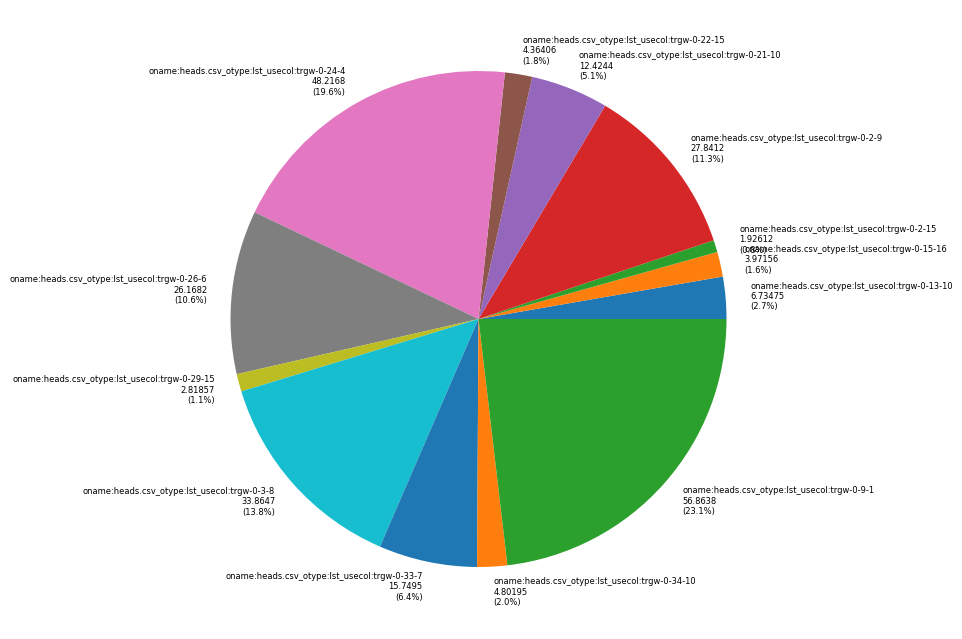

In [23]:
pst.plot(kind='phi_pie')
og_phi=pst.phi #save this for later

In [24]:
newbalance = {grp:1/len(pst.obs_groups)*pst.phi for grp in pst.obs_groups if 'heads' in grp}
pst.adjust_weights(obsgrp_dict=newbalance)

<Axes: >

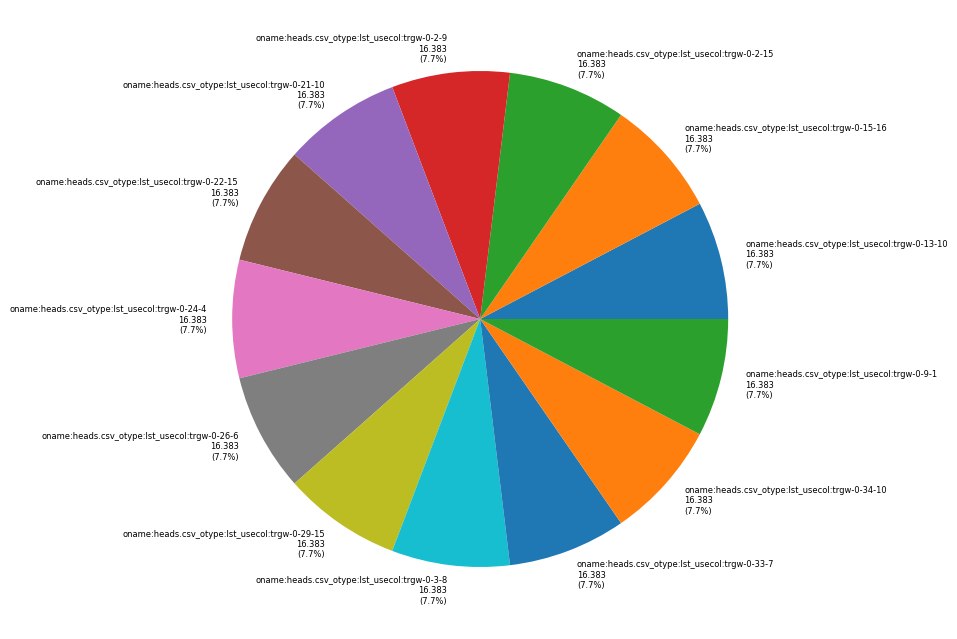

In [25]:
pst.plot(kind='phi_pie')

In [26]:
pst.control_data.noptmax=-1

In [27]:
pst.pestpp_options['ies_num_reals']=75
pst.pestpp_options['overdue_giveup_minutes']=10

In [28]:
pst.write('template/freyberg_prior.pst', version=2)

noptmax:-1, npar_adj:807, nnz_obs:325


In [29]:
pyemu.utils.start_workers('./template',master_dir='cm_prior', exe_rel_path='pestpp-ies',pst_rel_path='freyberg_prior.pst',worker_root='.', num_workers=10)



             pestpp-ies: a GLM iterative ensemble smoother

                   by the PEST++ development team


version: 5.2.6
binary compiled on Aug 15 2023 at 16:48:53

started at 10/01/23 20:52:12
...processing command line: ' ./pestpp-ies freyberg_prior.pst /h :4004'
...using panther run manager in master mode using port 4004

using control file: "freyberg_prior.pst"
in directory: "/Users/katherinemarkovich/Desktop/reimagined-adventure/cm_prior"
on host: "katie-mac.lan"

processing control file freyberg_prior.pst


:~-._                                                 _.-~:
: :.~^o._        ________---------________        _.o^~.:.:
 : ::.`?88booo~~~.::::::::...::::::::::::..~~oood88P'.::.:
 :  ::: `?88P .:::....         ........:::::. ?88P' :::. :
  :  :::. `? .::.            . ...........:::. P' .:::. :
   :  :::   ... ..  ...       .. .::::......::.   :::. :
   `  :' .... ..  .:::::.     . ..:::::::....:::.  `: .'
    :..    ____:::::::::.  . . ....:::::::::____  ... :
   :...

In [75]:
df = pd.read_csv('cm_prior/freyberg_prior.phi.actual.csv').T[6:]
print(df)

                 0
0              NaN
1     4.964810e+03
2     1.266390e+03
3              NaN
4              NaN
5     7.490550e+03
6     1.962290e+03
7     1.435960e+02
8              NaN
9     1.296700e+02
10    1.283840e+02
11    2.661270e+03
12    8.025240e+01
13    1.618820e+04
14    1.147290e+02
15    9.084720e+02
16    2.492550e+02
17    8.203200e+03
18    5.229370e+02
19    4.000170e+02
20             NaN
21    3.744020e+02
22    4.716650e+02
23    1.054530e+04
24             NaN
25    1.061760e+02
26    8.869590e+03
27    2.390680e+02
28    2.065820e+03
29    1.075420e+03
30    3.845880e+03
31    8.157710e+01
32    7.010800e+02
33    3.118740e+02
34    2.076880e+04
35             NaN
36             NaN
37             NaN
38    4.005530e+03
39    2.714980e+03
40             NaN
41    9.427180e+03
42             NaN
43    2.605460e+03
44             NaN
45    4.722090e+02
46    1.375080e+02
47    2.890210e+03
48    5.100850e+03
49             NaN
50    1.762670e+03
51          

In [77]:
df.dropna(inplace=True)
print(len(df))

56


# PART 1.5 - rejection sampling

In [78]:
#reject by convergence fail counts
pr_oe = pd.read_csv(os.path.join('cm_prior','freyberg_prior.0.obs.csv'))
fails = pr_oe.loc[:,pr_oe.columns.str.contains('fail')]
good_enough = fails.loc[fails['oname:convergence_failure_counts.csv_otype:lst_usecol:count_type:flow_fails']<1].index.values
print("number of good enough realisations:", good_enough.shape[0])

number of good enough realisations: 52


In [79]:
#reject by mass balance error (> 5%)
mbe = pr_oe.loc[:,pr_oe.columns.str.contains('percent_discrepancy')].max(axis=1)
good_enough = mbe.loc[mbe.values<5].index.values
print("number of good enough realisations:", good_enough.shape[0])

number of good enough realisations: 54


In [80]:
#reject by phi
acceptable_phi = og_phi * 2
good_enough = df.loc[df[0]<acceptable_phi].index.values
print("number of good enough realisations:", good_enough.shape[0])
print(good_enough)

number of good enough realisations: 27
['7' '9' '10' '12' '14' '16' '19' '21' '22' '25' '27' '31' '33' '45' '46'
 '55' '57' '58' '62' '64' '65' '68' '70' '71' '72' '73' 'base']


# PART 2 - iES

In [69]:
t_d = 'tmp'
if os.path.exists(t_d):
    shutil.rmtree(t_d)
shutil.copytree('cm_prior',t_d)
#hot start with rejection prior. need to rename files!
for filename,argname in zip(["freyberg_prior.0.par.csv","freyberg_prior.0.obs.csv","freyberg_prior.obs+noise.csv"],
                            ["ies_parameter_ensemble","ies_restart_observation_ensemble","ies_observation_ensemble"]):
    #load in and only keep "good enough" index
    df = pd.read_csv(os.path.join('cm_prior',filename),index_col=0)    
    df = df.loc[df.index.isin(good_enough),:]
    # a simple renaming scheme
    renamed_filename = "restart_"+filename
    # copy the original restart file from the prior master dir to the renamed filename in the template dir
    df.to_csv(os.path.join(t_d,renamed_filename))
    #modify/set the pestpp option
    pst.pestpp_options[argname] = renamed_filename

In [70]:
pst.control_data.noptmax = 2
pst.pestpp_options['ies_drop_conflicts']=True
pst.write(os.path.join(t_d,"freyberg_ies.pst"),version=2)
prep_deps(t_d)

noptmax:3, npar_adj:807, nnz_obs:325


In [71]:
m_d = 'master_ies'
pyemu.os_utils.start_workers(t_d, # the folder which contains the "template" PEST dataset
                            'pestpp-ies', #the PEST software version we want to run
                            'freyberg_ies.pst', # the control file to use with PEST
                            num_workers=10, #how many agents to deploy
                            worker_root='.', #where to deploy the agent directories; relative to where python is running
                            master_dir=m_d, #the manager directory
                            )



             pestpp-ies: a GLM iterative ensemble smoother

                   by the PEST++ development team


version: 5.2.6
binary compiled on Aug 15 2023 at 16:48:53

started at 10/01/23 21:03:12
...processing command line: ' ./pestpp-ies freyberg_ies.pst /h :4004'
...using panther run manager in master mode using port 4004

using control file: "freyberg_ies.pst"
in directory: "/Users/katherinemarkovich/Desktop/reimagined-adventure/master_ies"
on host: "katie-mac.lan"

processing control file freyberg_ies.pst


:~-._                                                 _.-~:
: :.~^o._        ________---------________        _.o^~.:.:
 : ::.`?88booo~~~.::::::::...::::::::::::..~~oood88P'.::.:
 :  ::: `?88P .:::....         ........:::::. ?88P' :::. :
  :  :::. `? .::.            . ...........:::. P' .:::. :
   :  :::   ... ..  ...       .. .::::......::.   :::. :
   `  :' .... ..  .:::::.     . ..:::::::....:::.  `: .'
    :..    ____:::::::::.  . . ....:::::::::____  ... :
   :... `:~

# some notes on spurious correlation with ensembles
### Calculating an empirical cross-covariance between large numbers of parameters and observations from a limited number of realizations is likely to result in spurious cross-correlations. Because of this, some parameters will be adjusted when they should not be adjusted. Furthermore, when large numbers of independent observations comprise a calibration dataset, a small ensemble size will almost certainly not provide enough degrees of freedom to reproduce these data

## solutions: pass ies a csv that explicitly tells it what data can inform which parameters (e.g., so heads don't inform porosity)
## orrrr just run a larger ensemble... (if you can)
## larger ensemble also has the effect of exploring uncertainty (remember we are sampling a distribution!) and for more "accurately" approximating the jacobian